In [139]:
import pandas as pd
import seaborn as sns
import math

In [140]:
df = pd.read_csv("data\Rport60BeforeCovid.csv")
df['Data'] = df['Data'].astype('datetime64[ns]')

In [141]:
df.describe()

,Equal Weights,HRP,MV
count,206.000000,206.000000,206.000000
mean,1.483463,1.207633,1.046465
std,7.140961,5.621287,5.071018
min,-31.222129,-24.552510,-19.159562
25%,-2.404298,-1.496020,-1.760766
50%,1.165318,0.971418,0.553035
75%,5.861446,5.104367,4.923248
max,28.407488,17.612941,17.813332


In [142]:
df

,Data,Equal Weights,HRP,MV
0,2005-01-01,-5.768847,-4.420817,-2.355550
1,2005-02-01,14.548543,12.923189,10.937546
2,2005-03-01,-6.405159,-6.251613,-5.384795
3,2005-04-01,-6.622281,-9.624687,-15.582348
4,2005-05-01,4.035351,3.453695,3.275437
...,...,...,...,...
201,2021-10-01,-6.789714,-2.039126,-0.200036
202,2021-11-01,1.693109,3.811374,4.548462
203,2021-12-01,5.180228,3.285184,2.513702
204,2022-01-01,4.035909,2.336790,0.117234


# Accumulated return

In [143]:
display(df['Equal Weights'].sum())
display(df['HRP'].sum())
display(df['MV'].sum())

305.59335113579175

248.77235740620006

215.57171543024162

In [144]:
sns.set(rc = {'figure.figsize':(30,8)})

# Returns by portfolio over the time

<AxesSubplot: xlabel='Data', ylabel='value'>

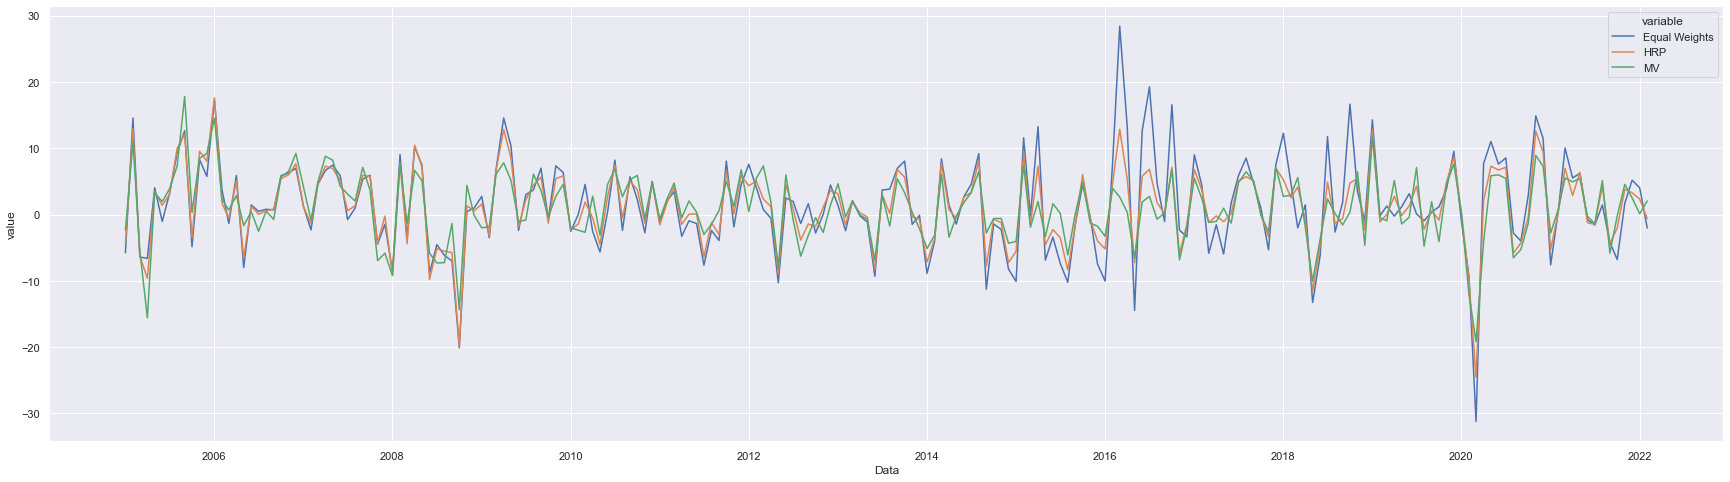

In [137]:
sns.lineplot(x='Data', y='value', hue='variable', 
             data=pd.melt(df, ['Data']))

### Pandemic Window

<AxesSubplot: xlabel='Data', ylabel='value'>

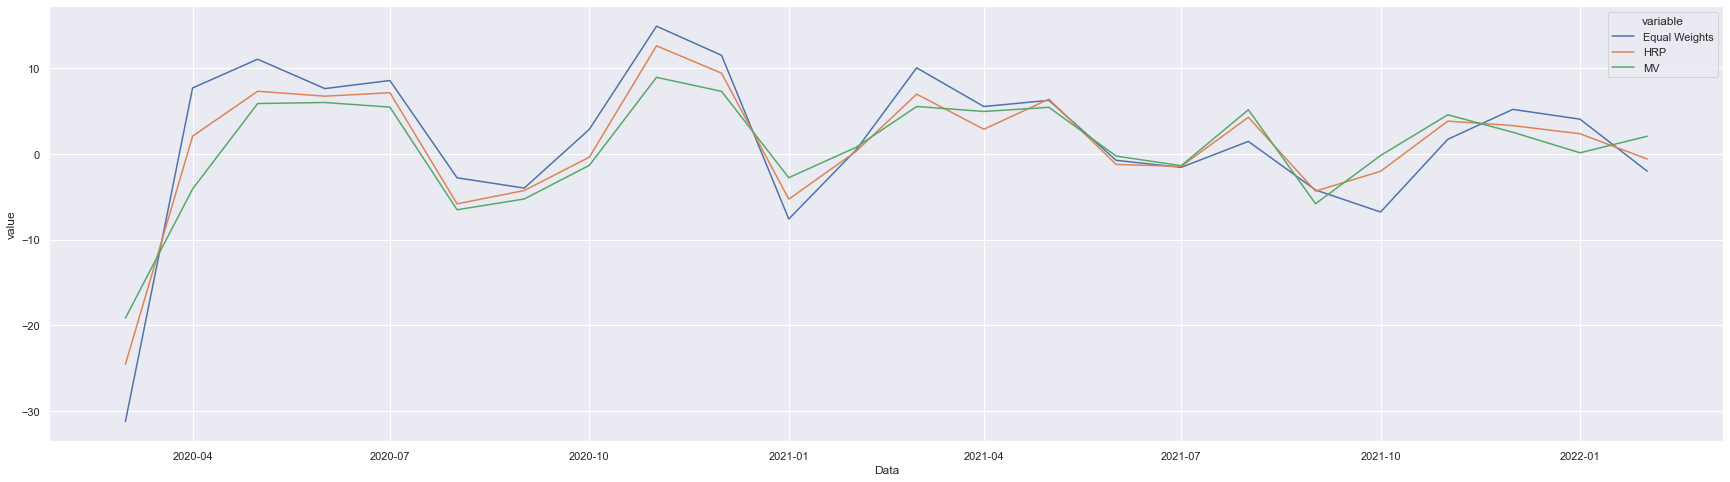

In [100]:
pandemic_df = df.loc[(df['Data'] >= '2020-03-01') & (df['Data'] < '2022-04-15')]
sns.lineplot(x='Data', y='value', hue='variable', 
             data=pd.melt(pandemic_df, ['Data']))


# Converting data to datetime

In [101]:
df['Ano'] = df['Data'].astype('datetime64[ns]')
df['Ano'] = df['Data'].dt.year.astype(int)

In [102]:
df_mean_by_year = df.groupby(['Ano'], as_index=False).mean()
df_median_by_year = df.groupby(['Ano'], as_index=False).median()
df_std_by_year = df.groupby(['Ano'], as_index=False).std()

# AV

In [103]:
def annualized_average_return(df, col):
  avg_return = df[col].mean()
  annualized_avg_return = 12 * avg_return

  return annualized_avg_return


In [104]:
av_df = pd.DataFrame(columns=['Portfolio', 'Annualized Average Return'])
columns = ['Equal Weights', 'HRP', 'MV']
for col in columns:
    avg_return = annualized_average_return(df, col)
    row = {'Portfolio': col, 'Annualized Average Return': avg_return}
    av_df = av_df.append(row, ignore_index=True)

av_df


C:\Users\felip\AppData\Local\Temp\ipykernel_20268\1689314024.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  av_df = av_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_20268\1689314024.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  av_df = av_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_20268\1689314024.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  av_df = av_df.append(row, ignore_index=True)


,Portfolio,Annualized Average Return
0,Equal Weights,17.801554
1,HRP,14.491594
2,MV,12.557576


<AxesSubplot: xlabel='Ano', ylabel='value'>

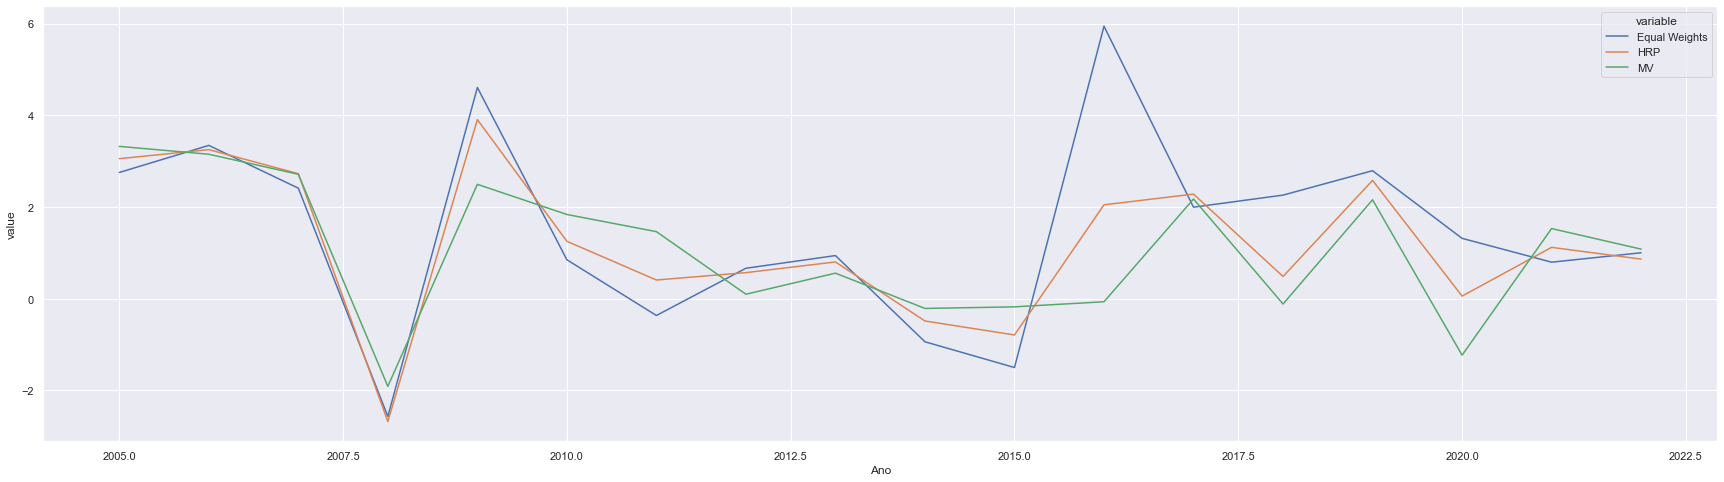

In [105]:
sns.lineplot(x='Ano', y='value', hue='variable', 
             data=pd.melt(df_mean_by_year, ['Ano']))


# SD

In [106]:
def annualized_standard_deviation(df, col):
  std = df[col].std()
  annualized_std = math.sqrt(12) * std

  return annualized_std


In [107]:
sd_df = pd.DataFrame(columns=['Portfolio', 'Annualized Standard Deviation'])

for col in columns:
    std = annualized_standard_deviation(df, col)
    row = {'Portfolio': col, 'Annualized Standard Deviation': std}
    sd_df = sd_df.append(row, ignore_index=True)

sd_df


C:\Users\felip\AppData\Local\Temp\ipykernel_20268\2712018244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sd_df = sd_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_20268\2712018244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sd_df = sd_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_20268\2712018244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sd_df = sd_df.append(row, ignore_index=True)


,Portfolio,Annualized Standard Deviation
0,Equal Weights,24.737015
1,HRP,19.472711
2,MV,17.566522


<AxesSubplot: xlabel='Ano', ylabel='value'>

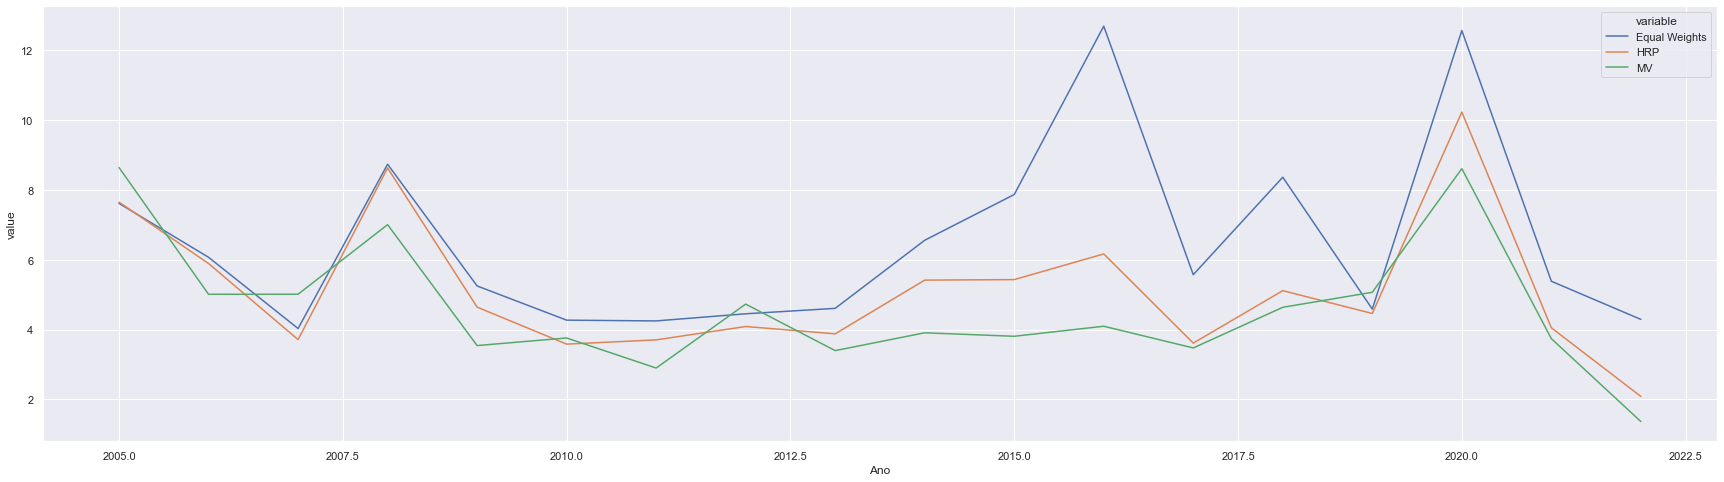

In [108]:
sns.lineplot(x='Ano', y='value', hue='variable', 
             data=pd.melt(df_std_by_year, ['Ano']))


# SR / ASR

In [109]:
def annualized_sharpe(df, col):
  df['excess_returns'] = df[col] - 0.005
  mean_excess_returns = df['excess_returns'].mean()
  std_excess_returns = df['excess_returns'].std()
  sharpe_ratio = mean_excess_returns / std_excess_returns
  annualized_sharpe = math.sqrt(12) * sharpe_ratio

  return annualized_sharpe


In [110]:
sr_df = pd.DataFrame(columns=['Portfolio', 'Annualized Sharpe'])

for col in columns:
  sharpe = annualized_sharpe(df, col)
  row = {'Portfolio': col, 'Annualized Sharpe': sharpe}
  sr_df = sr_df.append(row, ignore_index=True)

sr_df

C:\Users\felip\AppData\Local\Temp\ipykernel_20268\1199886754.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sr_df = sr_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_20268\1199886754.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sr_df = sr_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_20268\1199886754.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sr_df = sr_df.append(row, ignore_index=True)


,Portfolio,Annualized Sharpe
0,Equal Weights,0.717207
1,HRP,0.741119
2,MV,0.711443


# SoR

In [111]:
def annualized_sortino(df, col, mar):
  df['excess_returns'] = df[col] - mar
  mean_excess_returns = df['excess_returns'].mean()
  std_negative_excess_returns = df[df['excess_returns'] < 0]['excess_returns'].std()
  sortino_ratio = mean_excess_returns / std_negative_excess_returns
  annualized_sortino = math.sqrt(12) * sortino_ratio

  return annualized_sortino


In [112]:
sortino_df = pd.DataFrame(columns=['Portfolio', 'Annualized Sortino'])

mar = 0.005
columns = ['Equal Weights', 'HRP', 'MV']

for col in columns:
    sortino = annualized_sortino(df, col, mar)
    row = {'Portfolio': col, 'Annualized Sortino': sortino}
    sortino_df = sortino_df.append(row, ignore_index=True)

sortino_df


C:\Users\felip\AppData\Local\Temp\ipykernel_20268\628608509.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortino_df = sortino_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_20268\628608509.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortino_df = sortino_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_20268\628608509.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortino_df = sortino_df.append(row, ignore_index=True)


,Portfolio,Annualized Sortino
0,Equal Weights,1.084086
1,HRP,1.027975
2,MV,1.019789


# TO

In [113]:
def average_portfolio_turnover(df, col):
  df['weight_diff'] = (df[col] - df[col].shift()).abs()
  avg_turnover = df['weight_diff'].mean()

  return avg_turnover


In [114]:
turnover_df = pd.DataFrame(columns=['Portfolio', 'Average Turnover'])
columns = ['Equal Weights', 'HRP', 'MV']

for col in columns:
    turnover = average_portfolio_turnover(df, col)
    row = {'Portfolio': col, 'Average Turnover': turnover}
    turnover_df = turnover_df.append(row, ignore_index=True)
turnover_df


C:\Users\felip\AppData\Local\Temp\ipykernel_20268\499279984.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  turnover_df = turnover_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_20268\499279984.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  turnover_df = turnover_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_20268\499279984.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  turnover_df = turnover_df.append(row, ignore_index=True)


,Portfolio,Average Turnover
0,Equal Weights,7.069139
1,HRP,5.591157
2,MV,5.030822


# Metrics

In [92]:
metrics = pd.concat([av_df, sd_df['Annualized Standard Deviation'], sr_df['Annualized Sharpe'], sortino_df['Annualized Sortino'], turnover_df['Average Turnover']], axis=1)
metrics
metrics.to_excel("data\metrics_120_months_before_covid.xlsx", index=False)